In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import warnings
warnings.filterwarnings('ignore')

In [29]:
plt.rc("axes.spines", top=False, right=False)

In [4]:
features = pd.read_csv('Features data set.csv')
sales = pd.read_csv('sales data-set.csv')
stores = pd.read_csv('stores data-set.csv')

In [6]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
Store           8190 non-null int64
Date            8190 non-null object
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       4032 non-null float64
MarkDown2       2921 non-null float64
MarkDown3       3613 non-null float64
MarkDown4       3464 non-null float64
MarkDown5       4050 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
IsHoliday       8190 non-null bool
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 711.9+ KB


In [10]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [11]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [8]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
Store    45 non-null int64
Type     45 non-null object
Size     45 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


In [14]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


Let's combine these datasets in one dataframe for it will be helpful in some cases!

In [33]:
data = pd.merge(sales,features,on=['Store','Date','IsHoliday'],how='left')
data = pd.merge(data,stores,on=['Store'],how='left')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
Type            421570 non-null object
Size            421570 non-null int64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


Keeping both kinds could be helpful in some cases!

In [36]:
data_noNan = data.fillna(-999)
data_noNan.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,-999.0,-999.0,-999.0,-999.0,-999.0,211.096358,8.106,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,-999.0,-999.0,-999.0,-999.0,-999.0,211.242170,8.106,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,-999.0,-999.0,-999.0,-999.0,-999.0,211.289143,8.106,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,-999.0,-999.0,-999.0,-999.0,-999.0,211.319643,8.106,A,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,-999.0,-999.0,-999.0,-999.0,-999.0,211.350143,8.106,A,151315


In [38]:
data.duplicated().sum()

0

Let's plot some of the basic numerals and notice their varience over time!

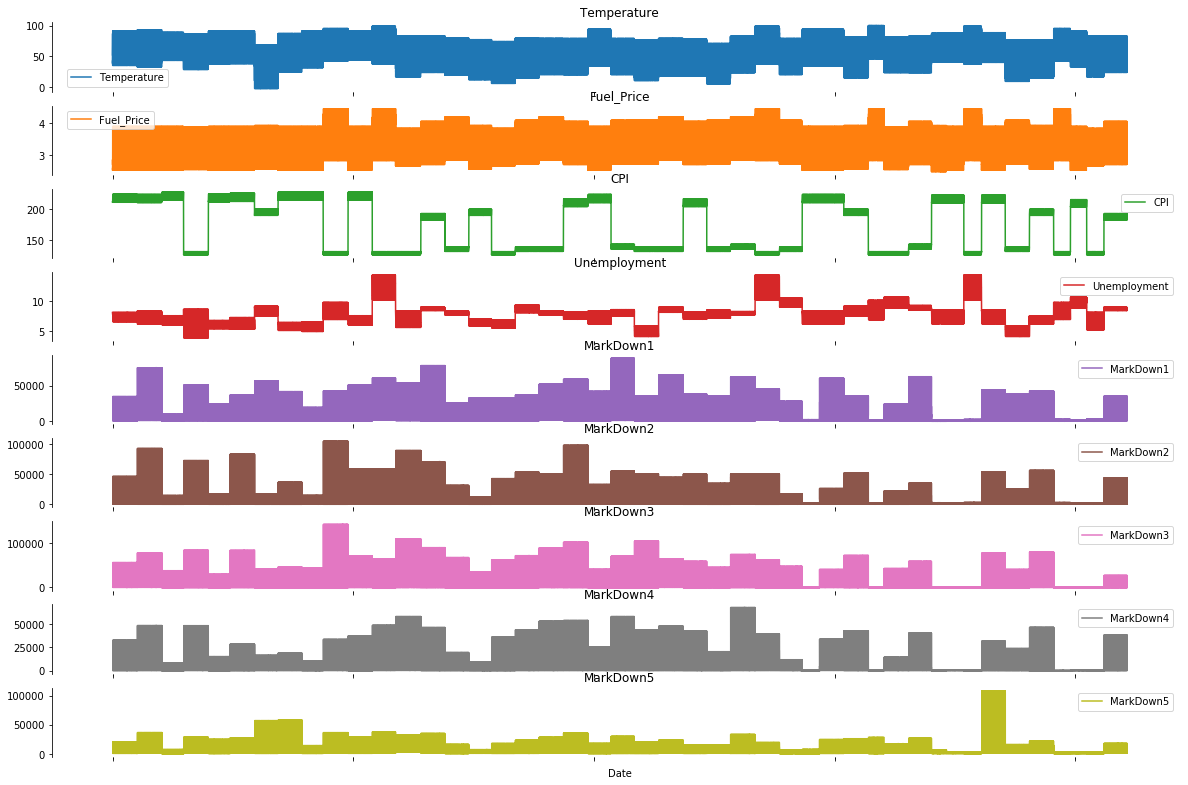

In [54]:
data[['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 
    'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].plot(x='Date', subplots=True, 
    figsize=(20,15),title=['Temperature', 'Fuel_Price', 'CPI', 'Unemployment','MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])
sns.despine(offset=10,bottom=True)
plt.show()

The change spectrum of all Markdowns are pretty much similar! though the intensity varies!

Let's take a look at total stores and the departments in them!

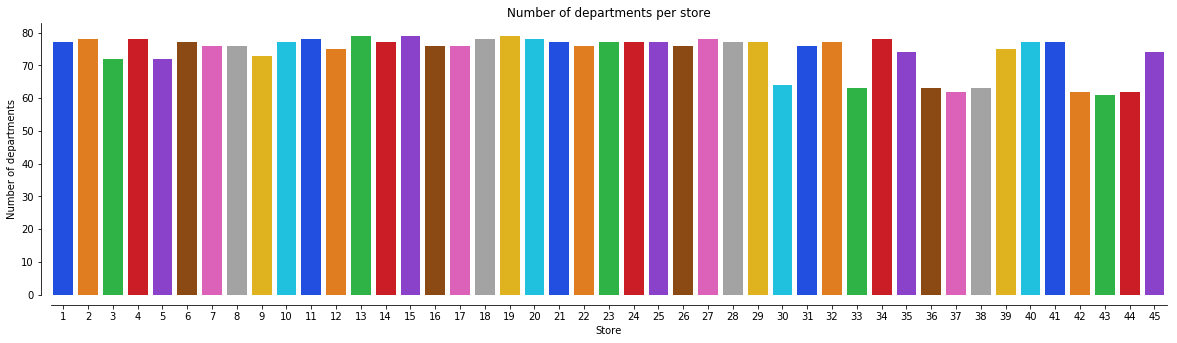

In [115]:
store_department = data.groupby(['Store'])['Dept'].nunique().reset_index()
plt.figure(figsize=(20,5))
sns.barplot(data=store_department,x='Store',y='Dept',palette='bright')
sns.despine(offset=10)
plt.title('Number of departments per store')
plt.ylabel('Number of departments')
plt.show()

As we can see, number of departments per store lie between 60-80!

Now lets look at the stores with maximum sales!

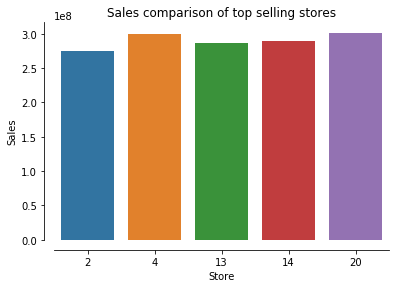

In [114]:
max_sale_stores = data.groupby(['Store'])['Weekly_Sales'].sum().reset_index()
sns.barplot(data=max_sale_stores.nlargest(5,columns='Weekly_Sales'),x='Store',y='Weekly_Sales')
plt.title('Sales comparison of top selling stores')
sns.despine(offset=10)
plt.ylabel('Sales')
plt.show()

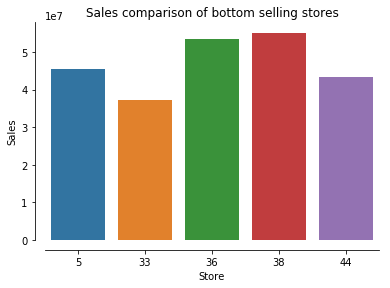

In [143]:
sns.barplot(data=max_sale_stores.nsmallest(5,columns='Weekly_Sales'),x='Store',y='Weekly_Sales')
plt.title('Sales comparison of bottom selling stores')
plt.ylabel('Sales')
sns.despine(offset=10)
plt.show()

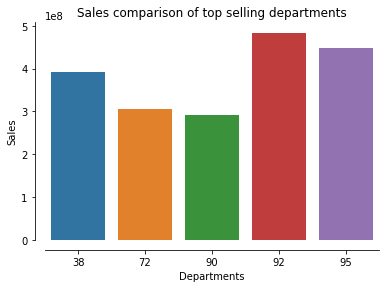

In [130]:
max_department_sales = data.groupby('Dept')['Weekly_Sales'].sum().reset_index().nlargest(5,columns='Weekly_Sales')
sns.barplot(data=max_department_sales,x='Dept',y='Weekly_Sales')
plt.title('Sales comparison of top selling departments')
plt.ylabel('Sales')
plt.xlabel('Departments')
sns.despine(offset=10)
plt.show()

Okay these five departments are the best selling ones but this is not really any usefull information unless attributed with the store. So lets plot the top 5 departments of top 5 selling stores!

As we already know the top selling stores! [2,4,13,14,20]

In [151]:
max_sale_stores_departments = data[data['Store'].isin([2,4,13,14,20])]
max_sale_stores_departments = max_sale_stores_departments.groupby(['Store','Dept'])['Weekly_Sales'].sum()
max_sale_stores_departments = max_sale_stores_departments

Store  Dept
2      1        4401251.25
       2        9425547.92
       3        2499148.56
       4        6521896.32
       5        4369410.09
       6         973598.70
       7        5788330.70
       8        8395153.83
       9        4915748.62
       10       5554957.19
       11       3343724.12
       12       1106240.32
       13       6594868.17
       14       3047921.01
       16       3861740.69
       17       1972092.15
       18       1320694.62
       19        579641.91
       20        822052.58
       21       1417264.40
       22       1847990.98
       23       4171398.17
       24       1188267.73
       25       2187829.70
       26       1336724.69
       27        262827.51
       28        114244.59
       29       1016942.02
       30        712305.22
       31        555520.25
                  ...     
20     52        466761.31
       54         31289.80
       55       2833685.59
       56        771711.24
       58        594281.59
       59       